In [1]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])

In [2]:
import os
import numpy as np 
import pandas as pd 
#import seaborn as sns
from scipy import stats
#import pandas_profiling as pp
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
#This function will download the dataset into your browser 
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [5]:
filename = "/kaggle/input/automobile-dataset/Automobile_data.csv"

In [7]:

df=pd.read_csv("auto-mpg.csv")
#df=pd.read_csv("/Desktop/NPower_CANADA/C_7Data_Analysis_Python/blackBoard/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET


In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    2
model year      2
origin          0
car name        0
CAR Number      7
dtype: int64

In [9]:
df.shape

(98, 10)

In [10]:

df.columns
df['car name'].replace(np.nan,'NNN',inplace=True)


In [11]:
df['acceleration'] = df['acceleration'].fillna(df['acceleration'].mean())
df['acceleration'].isnull().sum()
#avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
#print("Average of normalized-losses:", avg_norm_loss)
#df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

0

In [12]:
#df.tail(60)
df['car name'].isnull().sum()


0

In [63]:
df.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
93,14,8,318.0,150,4237,14.5,73.0,1,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,4735,11.0,73.0,1,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,4951,11.0,73.0,1,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,3821,11.0,73.0,1,amc ambassador brougham,TGTYY67
97,18,6,225.0,105,3121,16.5,73.0,1,plymouth valiant,HUYT76


#important

In [13]:
df['model year'].fillna((df['model year'].shift()+df['model year'].shift(-1))/2,inplace=True)


In [14]:
df['CAR Number'].replace(np.nan, 'NNNNNN',inplace=True)

In [15]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
CAR Number      0
dtype: int64

In [16]:
df.dtypes

mpg               int64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year      float64
origin            int64
car name         object
CAR Number       object
dtype: object

In [17]:
#Display the first five and last five rows
df.head()
df.tail()
#Display all the column names in the dataset
print(df.columns)
#Display the concise summary of your dataset
df.describe(include='all')
#Display the name of the car with maximum number of horsepower.#
#number of duplicate values
#df.duplicated().value_counts()
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'CAR Number'],
      dtype='object')


False    97
dtype: int64

In [18]:
df.groupby(by=['horsepower']).max()
#housepower_max_id=df[['horsepower']].idxmax()
#df['car name'].iloc[housepower_max_id]

,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name,CAR Number
horsepower,,,,,,,,,
46,26,4,97.0,1835,20.500000,70.0,2,volkswagen 1131 deluxe sedan,RHUSJ948
54,23,4,97.0,2254,23.500000,72.0,2,volkswagen type 3,ERT566
60,27,4,97.0,1834,19.000000,71.0,2,volkswagen model 111,TY56783
65,31,4,71.0,1773,14.046875,71.0,3,toyota corolla 1200,T568G4
69,35,4,96.0,2189,18.000000,72.0,3,renault 12 (sw),NNNNNN
70,30,4,91.0,2074,20.500000,71.5,2,plymouth cricket,TY6764
72,22,4,140.0,2408,19.000000,71.0,1,chevrolet vega (sw),GTY685E
76,30,4,121.0,2511,18.000000,72.0,2,volkswagen 411 (sw),NNNNNN
80,28,4,98.0,2164,19.000000,72.0,1,ford pinto,YU766J


In [19]:
housepower_max_id=df[['horsepower']].idxmax()
df['car name'].iloc[housepower_max_id]

8    pontiac catalina
Name: car name, dtype: object

In [20]:
df['L/100km'] = 235/df["mpg"]
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number,L/100km
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043,13.055556
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079,15.666667
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600,13.055556
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000,14.687500
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET,13.823529


In [21]:
df.drop('mpg',axis=1, inplace=True)

In [22]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number,L/100km
0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043,13.055556
1,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079,15.666667
2,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600,13.055556
3,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000,14.687500
4,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET,13.823529


In [23]:
#6. Normalize the column “Weight” so that the values range from 0 to 1
df['weight'] = df['weight']/df['weight'].max()
df.head()


,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number,L/100km
0,8,307.0,130,0.681712,12.0,70.0,1,chevrolet chevelle malibu,L6V 043,13.055556
1,8,350.0,165,0.718482,11.5,70.0,1,buick skylark 320,RTY079,15.666667
2,8,318.0,150,0.668482,11.0,70.0,1,plymouth satellite,MTP600,13.055556
3,8,304.0,150,0.667899,12.0,70.0,1,amc rebel sst,MNJ000,14.687500
4,8,302.0,140,0.671012,10.5,70.0,1,ford torino,JEETMEET,13.823529


In [24]:
df['horsepower'].dtypes


dtype('int64')

In [25]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 46.        , 105.66666667, 165.33333333, 225.        ])

In [26]:
bin_names = ['Little', 'Medium', 'High']

In [27]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=bin_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,130,Medium
1,165,Medium
2,150,Medium
3,150,Medium
4,140,Medium
5,198,High
6,220,High
7,215,High
8,225,High
9,190,High


In [28]:
df["horsepower-binned"].value_counts()

Little    44
Medium    30
High      23
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

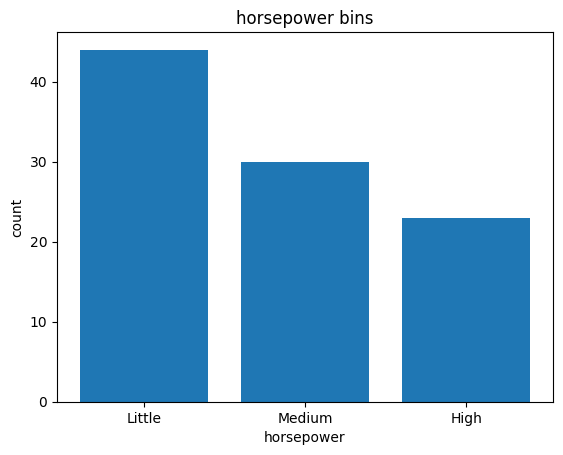

In [29]:
#the distribution of each bin:

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(bin_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

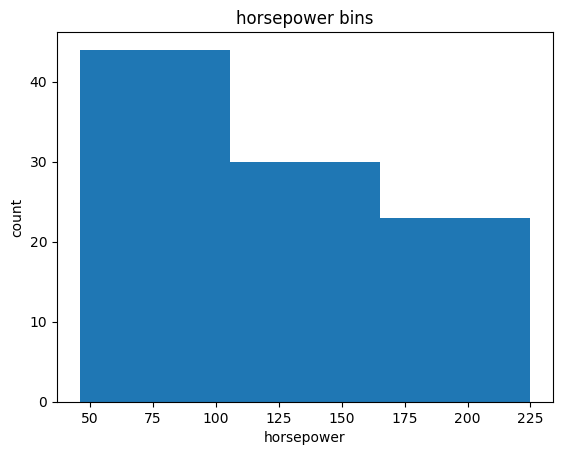

In [30]:
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [32]:
from scipy import stats
threshold = 3

z_horsepower = np.abs(stats.zscore(df['horsepower']))
outliers_horsepower = df[z_horsepower > threshold]
#print(outliers_horsepower)


z_acceleration = np.abs(stats.zscore(df['acceleration']))
#outliers_acceleration = df[z_acceleration > threshold]
print(z_acceleration.min())
print(z_acceleration.max())
print(z_acceleration.mean())
outliers_acceleration = df[z_acceleration > threshold]

outliers_acceleration
## drop rows containing outliers
df = df.drop(outliers_acceleration.index)
df
# replace outliers with median value
##df.loc[z_acceleration > threshold, 'acceleration'] = df['acceleration'].median()

0.0033507043002730273
2.3104839273297904
0.7917146182368316


,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number,L/100km,horsepower-binned
0,8,307.0,130,0.681712,12.0,70.0,1,chevrolet chevelle malibu,L6V 043,13.055556,Medium
1,8,350.0,165,0.718482,11.5,70.0,1,buick skylark 320,RTY079,15.666667,Medium
2,8,318.0,150,0.668482,11.0,70.0,1,plymouth satellite,MTP600,13.055556,Medium
3,8,304.0,150,0.667899,12.0,70.0,1,amc rebel sst,MNJ000,14.687500,Medium
4,8,302.0,140,0.671012,10.5,70.0,1,ford torino,JEETMEET,13.823529,Medium
...,...,...,...,...,...,...,...,...,...,...,...
93,8,318.0,150,0.824319,14.5,73.0,1,plymouth fury gran sedan,FGTEE4,16.785714,Medium
94,8,440.0,215,0.921206,11.0,73.0,1,chrysler new yorker brougham,GTTYR6,18.076923,High
95,8,455.0,225,0.963230,11.0,73.0,1,buick electra 225 custom,TTGGT53,19.583333,High
96,8,360.0,175,0.743385,11.0,73.0,1,amc ambassador brougham,TGTYY67,18.076923,High


In [33]:
#Plotting in Python:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
#Note that most of the plots that are of interest to us in this library are contained in the pyplot subfolder of the package.

matplotlib functions return a plot object which requires additional statements to display. While using matplotlib in Jupyter Notebooks, we require the graph to be displayed inside the notebook interface itself. 
It is, therefore, essential to add the following 'magic' statement after loading the library.

<class 'SyntaxError'>: invalid syntax (<ipython-input-33-aa9620c1ec4d>, line 6)